<a href="https://colab.research.google.com/github/atlantiquesun/Stock_ML/blob/main/standard_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from dateutil.relativedelta import relativedelta

# 1. Load and Preprocess the Dataset

In [83]:

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
 
#Beijing PM2.5 Dataset from the UCI Machine Learning Repository
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv", parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
df = df.drop(["No"], axis=1)
# manually specify column names
df.columns = ['pollution(t-1)', 'dew(t-1)', 'temp(t-1)', 'press(t-1)', 'wnd_dir(t-1)', 'wnd_spd(t-1)', 'snow(t-1)', 'rain(t-1)']
df.index.name = 'hour'
# mark all NA values with 0
df['pollution(t-1)'].fillna(0, inplace=True)
# drop the first 23 hours
df = df[23:]

features_column = ['pollution(t-1)', 'dew(t-1)', 'temp(t-1)', 'press(t-1)', 'wnd_dir(t-1)', 'wnd_spd(t-1)', 'snow(t-1)', 'rain(t-1)']

# convert "wnd_dir" to integer encodings
encoder = LabelEncoder()
df["wnd_dir(t-1)"] = encoder.fit_transform(df["wnd_dir(t-1)"])
# normalize features
df = df.astype("float32")
scaler = MinMaxScaler(feature_range=(0, 1))
df[features_column] = scaler.fit_transform(df[features_column])
# shift the features 
df["pollution(t)"] = df["pollution(t-1)"]
df[features_column] = df[features_column].shift(1)
df = df.dropna()

display(df)


,pollution(t-1),dew(t-1),temp(t-1),press(t-1),wnd_dir(t-1),wnd_spd(t-1),snow(t-1),rain(t-1),pollution(t)
hour,,,,,,,,,
2010-01-02 00:00:00,0.000000,0.338235,0.229508,0.527273,1.000000,0.000752,0.000000,0.0,0.129779
2010-01-02 01:00:00,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0,0.148893
2010-01-02 02:00:00,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0,0.159960
2010-01-02 03:00:00,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0,0.182093
2010-01-02 04:00:00,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0,0.138833
...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,0.010060,0.264706,0.278689,0.763638,0.333333,0.385730,0.000000,0.0,0.008048
2014-12-31 20:00:00,0.008048,0.250000,0.278689,0.781818,0.333333,0.395659,0.000000,0.0,0.010060
2014-12-31 21:00:00,0.010060,0.264706,0.262295,0.781818,0.333333,0.405588,0.000000,0.0,0.010060


In [33]:
def prepare_train_data(df, train_start_hour, train_window):

  start_hour = pd.to_datetime(train_start_hour)
  end_hour = start_hour + relativedelta(hours=train_window)

  train = df.loc[(df.index >= start_hour) & (df.index < end_hour)]
  train = train.values
  X_train = train[:, :-1]
  y_train = train[:, -1]

  return (X_train, y_train)


def prepare_val_data(df, train_start_hour, train_window, val_window):

  start_hour = pd.to_datetime(train_start_hour) + relativedelta(hours = train_window)
  end_hour = start_hour + relativedelta(hours = val_window)

  val = df.loc[(df.index >= start_hour) & (df.index < end_hour)]
  val = val.values
  X_val = val[:, :-1]
  y_val = val[:, -1]

  return (X_val, y_val)


def prepare_test_data(df, test_hour, test_window):

  start_hour = pd.to_datetime(test_hour)
  end_hour = start_hour + relativedelta(hours = test_window)
  
  test = df.loc[(df.index >= start_hour) & (df.index < end_hour)]
  test = test.values
  X_test = test[:, :-1]
  y_test = test[:, -1]

  return (X_test, y_test)

# 2. LSTM

Train data shape:  (8760, 1, 8) (8760,)
Validation data shape:  (8760, 1, 8) (8760,)
Epoch 1/50
122/122 - 3s - loss: 0.0589 - val_loss: 0.0493
Epoch 2/50
122/122 - 0s - loss: 0.0385 - val_loss: 0.0474
Epoch 3/50
122/122 - 0s - loss: 0.0234 - val_loss: 0.0376
Epoch 4/50
122/122 - 0s - loss: 0.0171 - val_loss: 0.0308
Epoch 5/50
122/122 - 0s - loss: 0.0156 - val_loss: 0.0208
Epoch 6/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0160
Epoch 7/50
122/122 - 0s - loss: 0.0147 - val_loss: 0.0155
Epoch 8/50
122/122 - 0s - loss: 0.0149 - val_loss: 0.0151
Epoch 9/50
122/122 - 0s - loss: 0.0148 - val_loss: 0.0150
Epoch 10/50
122/122 - 0s - loss: 0.0147 - val_loss: 0.0148
Epoch 11/50
122/122 - 0s - loss: 0.0146 - val_loss: 0.0147
Epoch 12/50
122/122 - 0s - loss: 0.0145 - val_loss: 0.0143
Epoch 13/50
122/122 - 0s - loss: 0.0146 - val_loss: 0.0143
Epoch 14/50
122/122 - 0s - loss: 0.0145 - val_loss: 0.0141
Epoch 15/50
122/122 - 0s - loss: 0.0145 - val_loss: 0.0141
Epoch 16/50
122/122 - 0s - loss: 0.0146

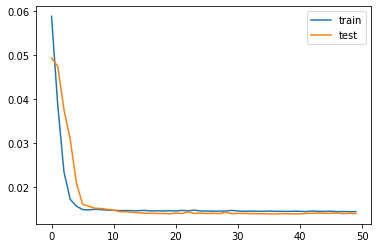

In [38]:
#standard results: https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

train_start_hour = pd.to_datetime("2010-01-02 00:00:00")
train_window = 365 * 24
val_window = 365 * 24
test_start_hour = train_start_hour + relativedelta(hours = train_window+val_window)
test_window = 365 * 24

X_train, y_train = prepare_train_data(df, train_start_hour, train_window)
X_val, y_val = prepare_val_data(df, train_start_hour, train_window, val_window)

#LSTM requires 3D input, [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) 
print("Train data shape: ", X_train.shape, y_train.shape)
print("Validation data shape: ", X_val.shape, y_val.shape)

#model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, y_train, epochs=50, batch_size=72, validation_data=(X_val, y_val), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

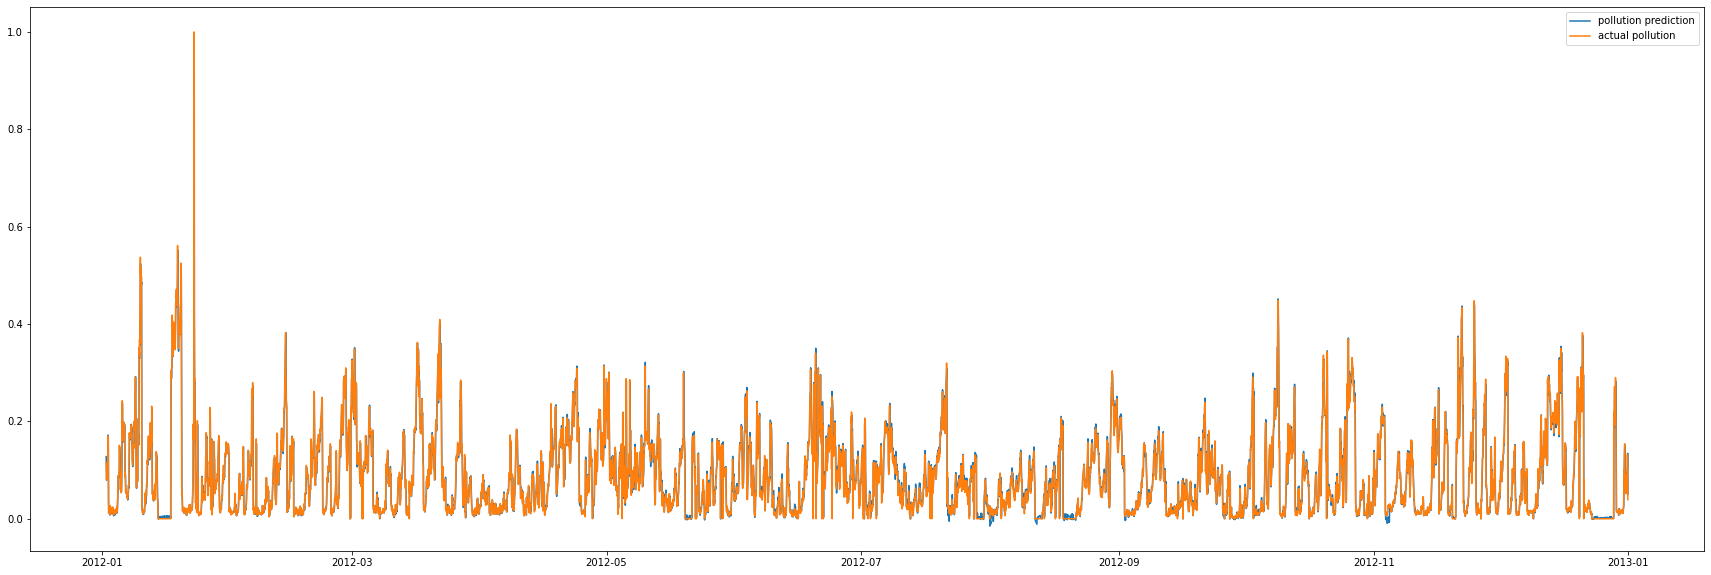

In [53]:
#make prediction
X_test, y_test = prepare_test_data(df, test_start_hour, test_window)
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
y_pred = model.predict(X_test)
y_pred = y_pred.squeeze()

x_label = pd.date_range(start=test_start_hour, end=test_start_hour+relativedelta(hours=test_window), freq='H')
x_label = x_label[:-1]
pyplot.figure(figsize = (30, 10))
pyplot.plot(x_label, y_pred, label="pollution prediction")
pyplot.plot(x_label, y_test, label="actual pollution")
pyplot.legend()
pyplot.show()

# 3. Linear Regression

 **2.1**
still using the UCI Beijing PM2.5 dataset

In [93]:
from sklearn.linear_model import LinearRegression

train_start_hour = pd.to_datetime("2010-01-02 00:00:00")
train_window = 365 * 24
#no validation for linear regression
test_start_hour = train_start_hour + relativedelta(hours = train_window+val_window)
test_window = 365 * 24

X_train, y_train = prepare_train_data(df, train_start_hour, train_window)

lr_regressor = LinearRegression()
model = lr_regressor.fit(X_train, y_train)
print("score of the model:", model.score(X_train, y_train))
print("coefficients:", model.coef_)

score of the model: 0.8915847438356674
coefficients: [ 0.919881    0.01987552 -0.02891752 -0.01404445  0.0093539  -0.00576047
 -0.01423276 -0.02504891]


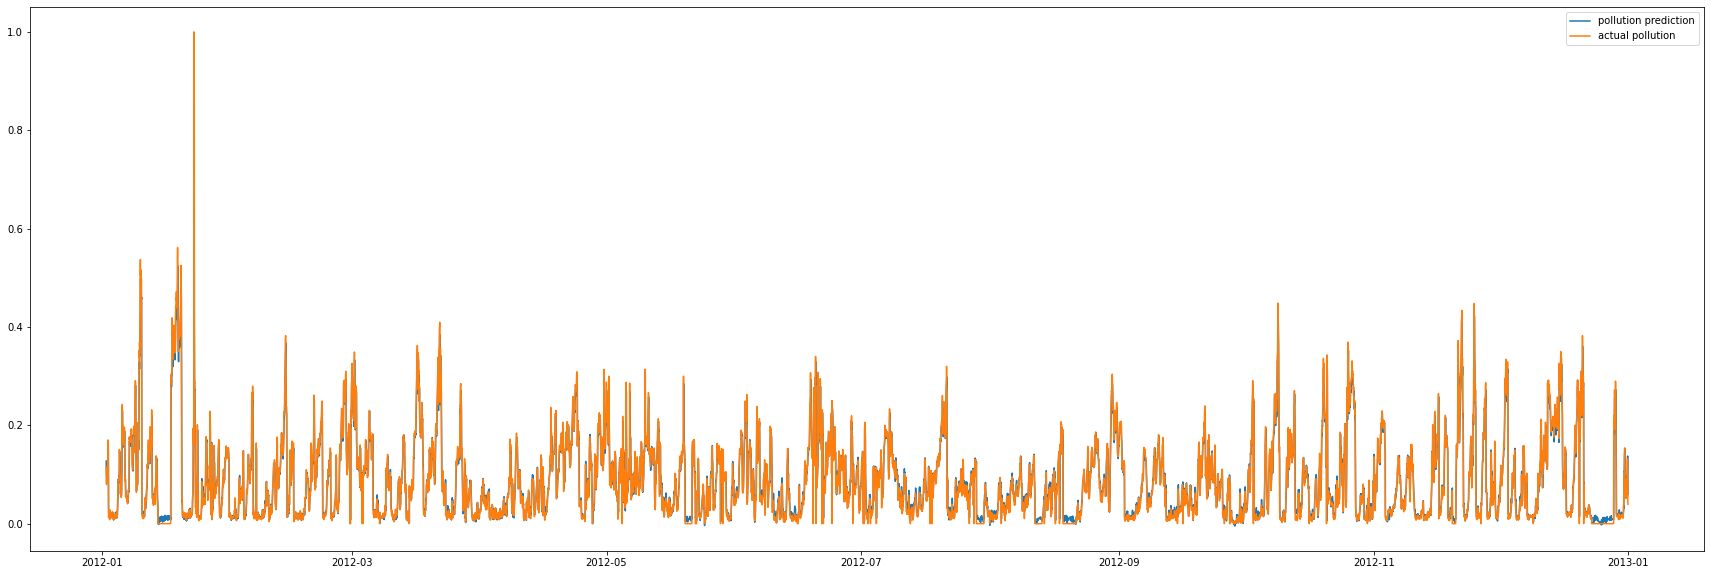

In [57]:
#test
X_test, y_test = prepare_test_data(df, test_start_hour, test_window)
y_pred = model.predict(X_test)

x_label = pd.date_range(start=test_start_hour, end=test_start_hour+relativedelta(hours=test_window), freq='H')
x_label = x_label[:-1]
pyplot.figure(figsize = (30, 10))
pyplot.plot(x_label, y_pred, label="pollution prediction")
pyplot.plot(x_label, y_test, label="actual pollution")
pyplot.legend()
pyplot.show()

**2.2** sine function as dataset

(600, 1) (600,)


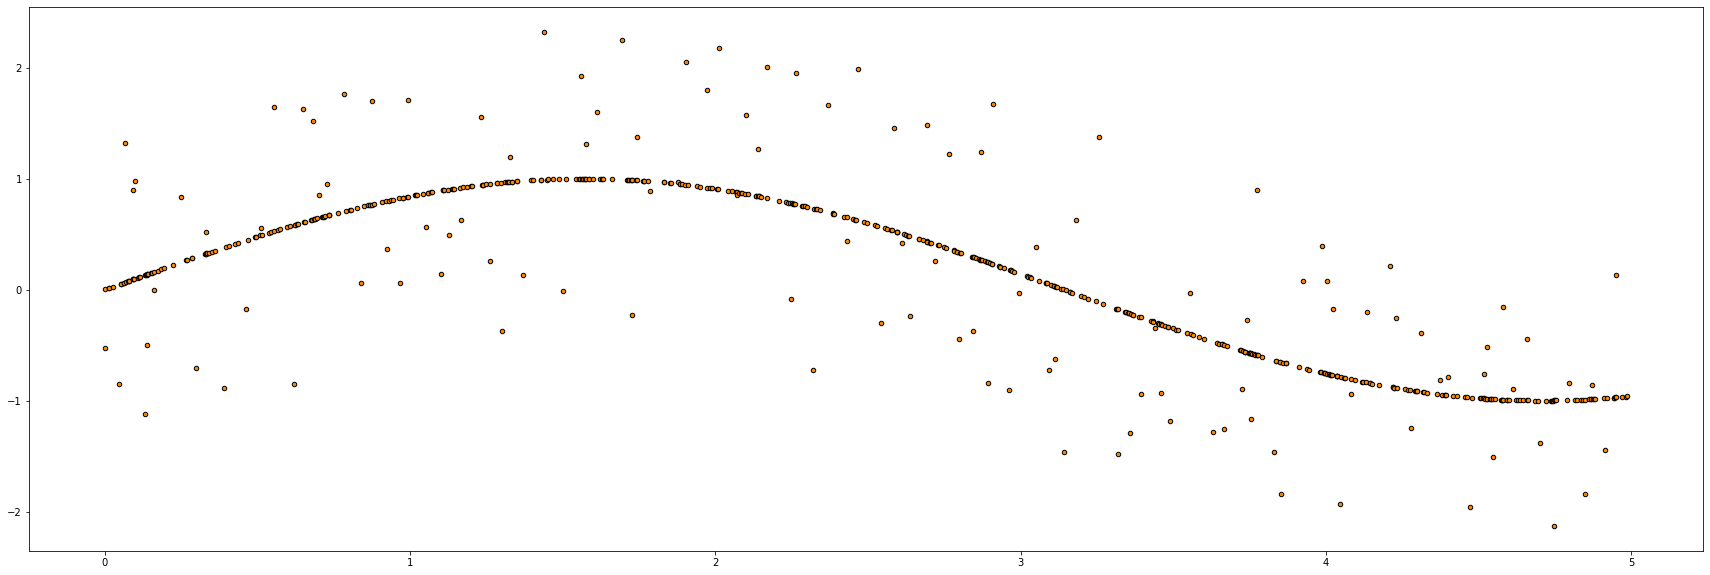

In [75]:
n_samples = 600

rng = np.random.RandomState(1)
x = np.sort(5 * rng.rand(n_samples,1),axis = 0)
y = np.sin(x).ravel() #Generate sine curve
y[::5] +=3 *(0.5-rng.rand(int(n_samples/5)))#Add noise to the sine curve
print(x.shape, y.shape)

plt.figure(figsize=(30, 10))
plt.scatter(x,y,s=20,edgecolor="black",c= "darkorange",label = "date")
plt.show()

In [76]:
train_size = 480
test_size = 120

X_train = x[:train_size, :]
y_train = y[:train_size]
X_test = x[:test_size, :]
y_test = y[:test_size]

lr_regressor = LinearRegression()
model = lr_regressor.fit(X_train, y_train)
print("score of the model:", model.score(X_train, y_train))
print("coefficients:", model.coef_)

score of the model: 0.22228400672488013
coefficients: [-0.26390356]


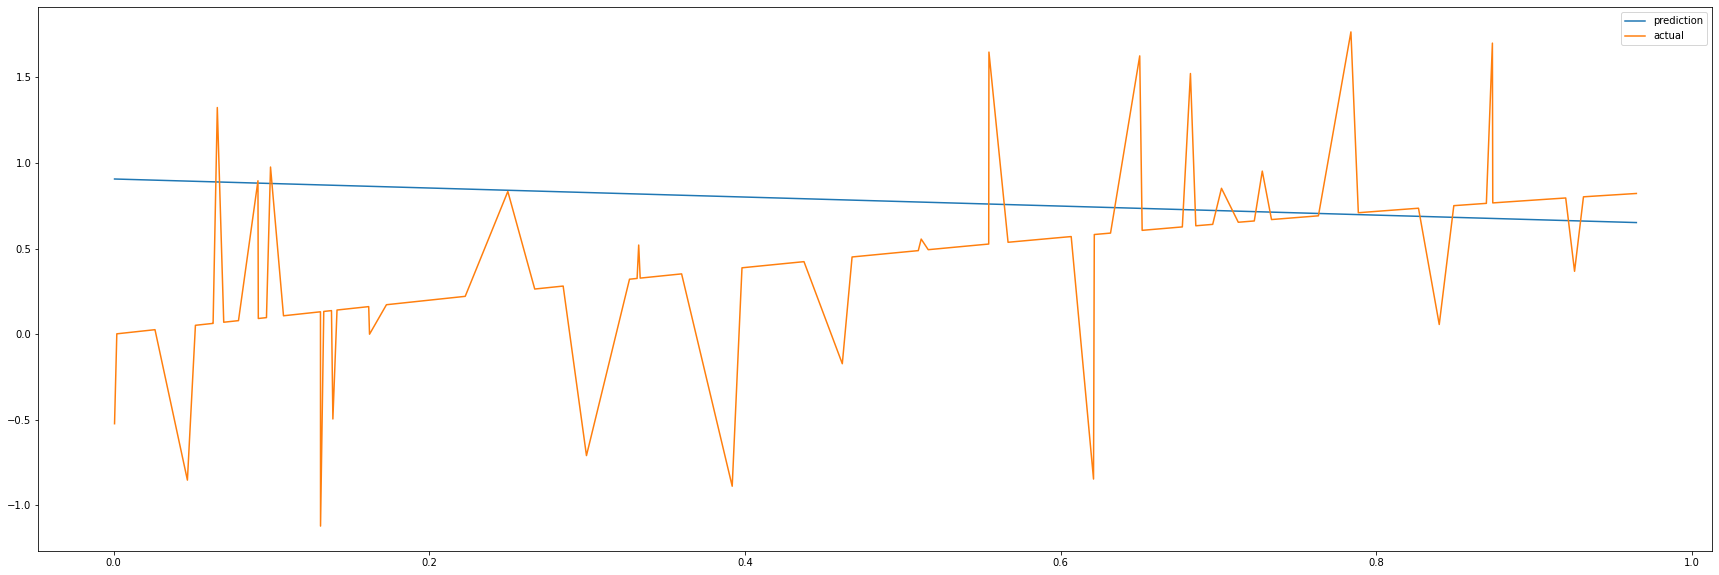

In [77]:
y_pred = model.predict(X_test)

pyplot.figure(figsize = (30, 10))
pyplot.plot(X_test, y_pred, label="prediction")
pyplot.plot(X_test, y_test, label="actual")
pyplot.legend()
pyplot.show()

# 4. Lasso

**2.1** Still using Beijing PM2.5 dataset

In [101]:
from sklearn.linear_model import Lasso

train_start_hour = pd.to_datetime("2010-01-02 00:00:00")
train_window = 365 * 24
#no validation for lasso
test_start_hour = train_start_hour + relativedelta(hours = train_window+val_window)
test_window = 365 * 24

X_train, y_train = prepare_train_data(df, train_start_hour, train_window)
print(X_train.shape, y_train.shape)

lasso_regressor = Lasso(alpha=0.001)
model = lasso_regressor.fit(X_train, y_train)
print("score of the model:", model.score(X_train, y_train))
print("coefficients:", model.coef_)

(8760, 8) (8760,)
score of the model: 0.8773931970164183
coefficients: [ 0.825032    0.          0.         -0.          0.00591051 -0.
 -0.         -0.        ]


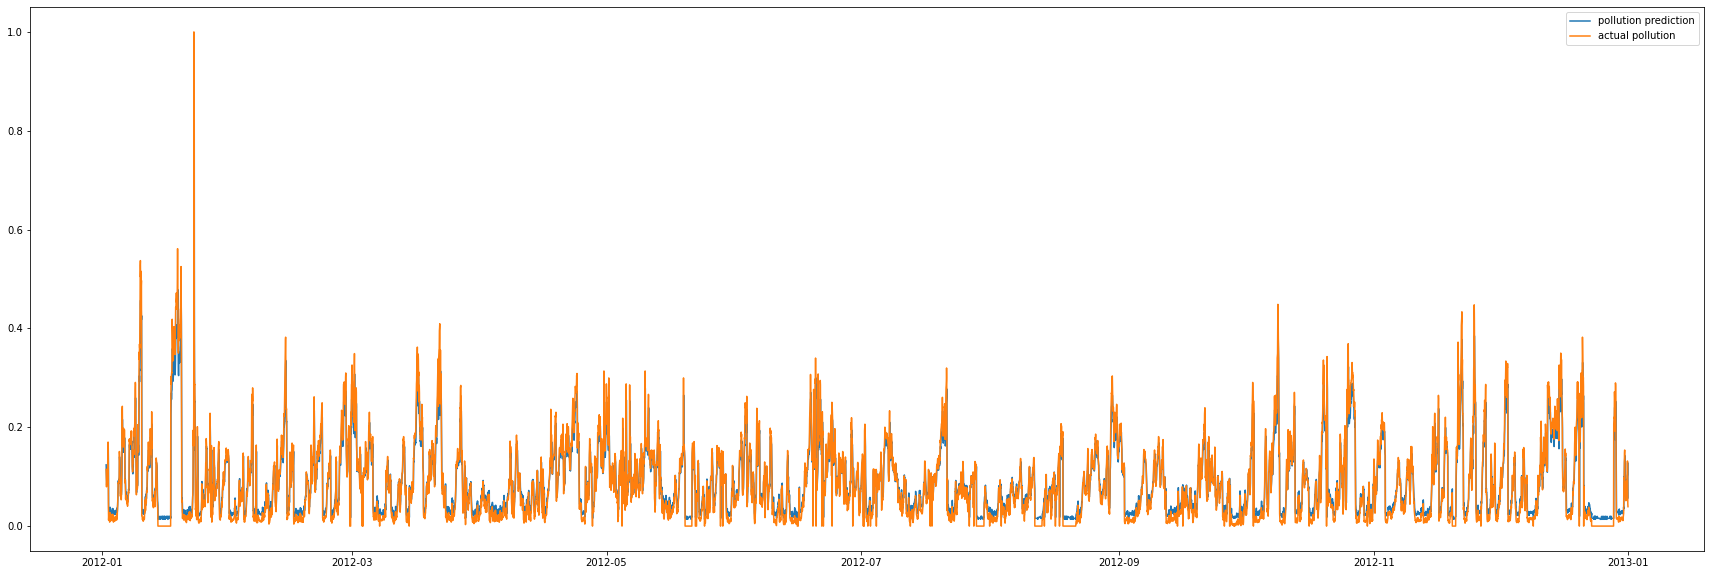

In [102]:
#test
X_test, y_test = prepare_test_data(df, test_start_hour, test_window)
y_pred = model.predict(X_test)

x_label = pd.date_range(start=test_start_hour, end=test_start_hour+relativedelta(hours=test_window), freq='H')
x_label = x_label[:-1]
pyplot.figure(figsize = (30, 10))
pyplot.plot(x_label, y_pred, label="pollution prediction")
pyplot.plot(x_label, y_test, label="actual pollution")
pyplot.legend()
pyplot.show()